# Imports

In [5]:
%run PII_Util.py

In [6]:
text_test = """Meet Jane Doe, a brilliant student at XYZ University. She can be reached at jane.doe@email.com or through her phone number +1234567890. Jane resides at 123 Main Street, Cityville. Her student ID is 987654 and her personal website is www.janedoe.com. Connect with her on social media using the username @janedoe.

Meanwhile, John Smith, another outstanding student, can be contacted at john.smith@email.com or at +9876543210. John lives at 456 Oak Avenue, Townsville. His student ID is 123456, and you can visit his personal blog at www.johnsmithblog.com. Follow him on Twitter with the handle @johnsmith123.

For any inquiries about the university's programs, you can contact the administration office at admin@xyzuniversity.edu or call +5551234567. The office is located at 789 University Boulevard.

Visit our official website at www.xyzuniversity.edu for more information on courses and admission procedures.

"""


In [7]:
text_test

"Meet Jane Doe, a brilliant student at XYZ University. She can be reached at jane.doe@email.com or through her phone number +1234567890. Jane resides at 123 Main Street, Cityville. Her student ID is 987654 and her personal website is www.janedoe.com. Connect with her on social media using the username @janedoe.\n\nMeanwhile, John Smith, another outstanding student, can be contacted at john.smith@email.com or at +9876543210. John lives at 456 Oak Avenue, Townsville. His student ID is 123456, and you can visit his personal blog at www.johnsmithblog.com. Follow him on Twitter with the handle @johnsmith123.\n\nFor any inquiries about the university's programs, you can contact the administration office at admin@xyzuniversity.edu or call +5551234567. The office is located at 789 University Boulevard.\n\nVisit our official website at www.xyzuniversity.edu for more information on courses and admission procedures.\n\n"

# Data

In [8]:
import pandas as pd
from datasets import Dataset
from datasets import load_dataset, load_from_disk

In [9]:
path_train = './in/train.json'
path_test = './in/test.json'# Data

In [10]:
train_json = json.load(open(path_train))
df_train = pd.json_normalize(train_json)

test_json = json.load(open(path_test))
df_test = pd.json_normalize(test_json)

In [11]:
hf_dataset = Dataset.from_pandas(df_train)

In [12]:
tokenized_datasets = hf_dataset.map(tokenize_function, fn_kwargs={"model_adapter": model_adapter}, batched=False)

Map: 100%|█████████████████████████████████████████████████████████████████| 6807/6807 [01:05<00:00, 103.36 examples/s]


In [13]:
preprocessed_datasets = tokenized_datasets

### Split

In [14]:
# preprocessed_dataset = load_from_disk("./in/tokenized_datasets")

In [15]:
# dataset_filtered = preprocessed_dataset.remove_columns(list_remove)
# dataset_filtered = preprocessed_dataset

In [16]:
train_size = int(0.8 * len(hf_dataset))
eval_size = len(hf_dataset) - train_size
# train_dataset, eval_dataset = preprocessed_dataset.train_test_split(test_size=eval_size)
# list_remove = ['labels']

split_datasets = preprocessed_dataset.train_test_split(test_size=eval_size, seed = 42)
train_dataset = split_datasets['train']
eval_dataset = split_datasets['test']

NameError: name 'preprocessed_dataset' is not defined

# Trainer API

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback

In [ ]:
training_args = TrainingArguments(
    per_device_train_batch_size=4,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=50,
    save_steps=500,
    output_dir='./results', 
    optim="adafactor",
    per_device_eval_batch_size=4,        # batch size for evaluation
    warmup_steps=500,                    # number of warmup steps for learning rate scheduler
    weight_decay=0.01,                   # strength of weight decay
    evaluation_strategy="steps",
    eval_steps=250,                      # evaluate every 500 steps
    load_best_model_at_end=True,           # stop training if no improvement for 3 evaluations
    
)

trainer = Trainer(
    model=model,                       # the instantiated 🤗 Transformers model to be trained
    args=training_args,                # training arguments, defined above
    train_dataset=train_dataset,       # training dataset
    eval_dataset=eval_dataset,          # evaluation dataset
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [70]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size per device during training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,                # log every 10 steps
    evaluation_strategy="epoch"      # evaluate at the end of each epoch
    load_best_model_at_end=True,
)

# Instantiate Trainer with your model, training arguments, and validation data
trainer = Trainer(
    model=model,                       # the instantiated 🤗 Transformers model to be trained
    args=training_args,                # training arguments, defined above
    train_dataset=train_dataset,       # training dataset
    eval_dataset=eval_dataset,          # evaluation dataset
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3693001024.py, line 10)

In [63]:
train_dataset

Dataset({
    features: ['document', 'full_text', 'tokens', 'trailing_whitespace', 'labels', 'input_ids', 'attention_mask', 'words', 'word_labels', 'word_ids'],
    num_rows: 5445
})

In [64]:
list_input_ids = train_dataset['input_ids']
list_label_ids = train_dataset['labels']

In [67]:
enumerate(zip(list_input_ids,list_label_ids))

In [68]:
for i, (input_ids, label_ids) in enumerate(zip(list_input_ids,list_label_ids)):
    if len(input_ids) != len(label_ids):
        print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
len(train_dataset['input_ids'][0])

743

In [69]:
trainer.train()

ValueError: expected sequence of length 195 at dim 1 (got 843)

## Instantiate

In [23]:
%%time
model_adapter = Yanis_Adapter(threshold = 0.1, num_labels = len(classes))
model = model_adapter.model
# text = text_test
# text = df_train.loc[0].full_text
# labels_true = df_train.loc[0].labels
# threshold = 0.1

Some weights of DebertaV2ForTokenClassification were not initialized from the model checkpoint at Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([18, 1024]) in the checkpoint and torch.Size([13, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([18]) in the checkpoint and torch.Size([13]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: total: 9.67 s
Wall time: 9.4 s


In [15]:
model_adapter = PII_Adapter(model_name ="Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1", threshold = 0.1, checkpoint_path='./fine_tuned/yanis/checkpoint-3000')

In [9]:
model_adapter

In [16]:
model_adapter = Yanis_Adapter(threshold = 0.1, checkpoint_path='./fine_tuned/yanis/checkpoint-3000')

In [19]:
model_adapter = Yanis_Adapter(threshold = 0.1, num_labels = len(classes))

Some weights of DebertaV2ForTokenClassification were not initialized from the model checkpoint at Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([18, 1024]) in the checkpoint and torch.Size([13, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([18]) in the checkpoint and torch.Size([13]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
model_adapter.model.config.label2id

{'LABEL_0': 0,
 'LABEL_1': 1,
 'LABEL_2': 2,
 'LABEL_3': 3,
 'LABEL_4': 4,
 'LABEL_5': 5,
 'LABEL_6': 6,
 'LABEL_7': 7,
 'LABEL_8': 8,
 'LABEL_9': 9,
 'LABEL_10': 10,
 'LABEL_11': 11,
 'LABEL_12': 12}

In [40]:
config = AutoConfig.from_pretrained("Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1", num_labels=len(classes))
model = AutoModelForTokenClassification.from_pretrained("Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1", config=config,  ignore_mismatched_sizes=True)

Some weights of DebertaV2ForTokenClassification were not initialized from the model checkpoint at Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([18, 1024]) in the checkpoint and torch.Size([13, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([18]) in the checkpoint and torch.Size([13]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model.config.label2id

NameError: name 'model' is not defined

In [ ]:
 checkpoint_path='./fine_tuned/yanis/checkpoint-3000', 

In [ ]:
model_adapter.

In [30]:
model_adapter.model.config.num_labels

18

# Results Analysis

In [17]:
from datasets import load_dataset, load_from_disk
from collections import Counter

In [18]:
%%time
def pad_lists(lst, pad_value, max_length = None):
    if max_length is None:
        max_length = max(len(sublist) for sublist in lst)
    padded_lst = np.full((len(lst), max_length), pad_value)
    for i, sublist in enumerate(lst):
        padded_lst[i, :len(sublist)] = sublist
    return padded_lst

# Example list of lists with varying lengths
# list_of_lists = [[1, 2, 3], [4, 5], [6], [7, 8, 9, 10]]

# # Padding value
# pad_value = -100

# # Convert to numpy array with padding
# padded_array = pad_lists(tokenized_datasets['labels'], pad_value)
# padded_array.shape

CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
%%time
preprocessed_dataset = load_from_disk("./in/tokenized_datasets")

CPU times: total: 62.5 ms
Wall time: 33 ms


In [20]:
%%time
loaded_predictions = np.load("./in/preds01.npy")

CPU times: total: 1.2 s
Wall time: 20.7 s


In [21]:
%%time
labels_padded = pad_lists(tokenized_datasets['labels'], -100, loaded_predictions.shape[1])

CPU times: total: 4 s
Wall time: 4.01 s


In [22]:
tokenized_datasets

Dataset({
    features: ['document', 'full_text', 'tokens', 'trailing_whitespace', 'labels', 'input_ids', 'attention_mask', 'words', 'word_labels', 'word_ids'],
    num_rows: 6807
})

# Align Predictions

## Refactored

In [25]:
def compute_metrics_base(eval_preds, model_adapter, threshold = 0.1):
    
    # -- Temp
    global eval_preds_copy
    eval_preds_copy = eval_preds
    # -- Temp
    
    
    np_probs, true_labels_id, inputs = eval_preds
#     logits, true_labels_id = eval_preds
#     np_probs = np.argmax(logits, axis=-1)
#     tokens = inputs.tokens()

    label2id =  model_adapter.model.config.label2id
    o_index = label2id['O']

    np_sorted_indices = np.argsort(np_probs)
    np_max_indices = np_sorted_indices[:,:, -1]
    # np_max = np_sorted_indices[np.arange(np_max_indices.shape[0]), np_max_indices]
    np_max_prob = np.take_along_axis(np_probs, np_max_indices[:, :, np.newaxis], axis=2).squeeze()

    np_2nd_max_indices = np_sorted_indices[:, :, -2]
    # np_2nd_max = np_sorted_indices[np.arange(np_sorted_indices.shape[0]), np_max_indices]
    np_2nd_max_prob = np.take_along_axis(np_probs, np_2nd_max_indices[:, :, np.newaxis], axis=2).squeeze()

    np_O_mask = np_max_indices == o_index
    np_threshold_mask = np_2nd_max_prob > threshold

    np_replace_mask = np_threshold_mask & np_O_mask

    np_label_ids = np.where(np_replace_mask, np_2nd_max_indices, np_max_indices)

    flat_label_ids = np_label_ids.flatten()
    flat_true_labels_id = true_labels_id.flatten()

    # Postprocess labels, convert irrelevant labels to 'O'
    np_labels_irrelevant = np.array(model_adapter.labels_irrelevant)
    flat_label_ids_mask = np.isin(flat_label_ids, np_labels_irrelevant)
    flat_label_ids[flat_label_ids_mask] = o_index

    # Also remove paddings
    mask_padding_inv = flat_true_labels_id != -100
    flat_true_labels_id = flat_true_labels_id[mask_padding_inv]
    flat_label_ids = flat_label_ids[mask_padding_inv]

    dict_scores = {}

    f1_score = METRIC_F1.compute(predictions=flat_label_ids, references=flat_true_labels_id, labels=classes_pos_id, average ='micro')
    f_beta_score = fbeta_score(y_true = flat_true_labels_id, y_pred = flat_label_ids , labels = classes_pos_id,beta=5, average='micro')
    precision = METRIC_PRECISION.compute(predictions=flat_label_ids, references=flat_true_labels_id,labels=classes_pos_id, average ='micro')
    recall = METRIC_RECALL.compute(predictions=flat_label_ids, references=flat_true_labels_id,labels=classes_pos_id, average ='micro')

    for score in [f1_score, precision, recall]:
        dict_scores.update(score) 

    dict_scores['f_beta'] = f_beta_score

    return dict_scores


In [26]:
compute_metrics = functools.partial(compute_metrics_base, model_adapter=model_adapter, threshold=0.1)

## Trainer API

In [23]:
list_word_ids = [[word_id if word_id is not None else -100 for word_id in word_ids] for word_ids in tokenized_datasets['word_ids'] ]

word_ids_padded = pad_lists(list_word_ids, -100,  loaded_predictions.shape[1])

In [24]:
%%time
def run():
    
    np_probs = loaded_predictions
    true_labels_id = labels_padded
    threshold = 0.18
    
    # --- Initialize variables
    label2id =  model_adapter.model.config.label2id
    o_index = label2id['O']

    # --- Get indices of highest probabilities
    np_sorted_indices = np.argsort(np_probs)
    np_max_indices = np_sorted_indices[:,:, -1]
    # np_max = np_sorted_indices[np.arange(np_max_indices.shape[0]), np_max_indices]
    np_max_prob = np.take_along_axis(np_probs, np_max_indices[:, :, np.newaxis], axis=2).squeeze()

    
    # --- Get 2nd max probabilities
    np_2nd_max_indices = np_sorted_indices[:, :, -2]
    # np_2nd_max = np_sorted_indices[np.arange(np_sorted_indices.shape[0]), np_max_indices]
    np_2nd_max_prob = np.take_along_axis(np_probs, np_2nd_max_indices[:, :, np.newaxis], axis=2).squeeze()

    # --- Coniditional replace (Positive label thresholding)
    
    #Masks
    np_O_mask = np_max_indices == o_index
    np_threshold_mask = np_2nd_max_prob > threshold
    np_replace_mask = np_threshold_mask & np_O_mask

    #Replace
    np_label_ids = np.where(np_replace_mask, np_2nd_max_indices, np_max_indices)


    # Postprocess labels, convert irrelevant labels to 'O'
    np_labels_irrelevant = np.array(model_adapter.labels_irrelevant)
    label_ids_mask = np.isin(np_label_ids, np_labels_irrelevant)
    np_label_ids[label_ids_mask] = o_index

    # Flatten token(subwords) for metrics
    flat_label_ids = np_label_ids.flatten()
    flat_true_labels_id = true_labels_id.flatten()

    # Remove padding preds for metrics
    mask_padding_inv = flat_true_labels_id != -100
    flat_true_labels_id = flat_true_labels_id[mask_padding_inv]
    flat_label_ids = flat_label_ids[mask_padding_inv]
    
    return np_label_ids, flat_true_labels_id, flat_label_ids

np_label_ids, flat_true_labels_id, flat_label_ids = run()


CPU times: total: 8.03 s
Wall time: 8.2 s


In [25]:
%%time
def run():

    pred_tokens = np_label_ids
    #Exclude beginning [CLS] Token 
    #Also excludes end padding tokens by not appending row size (?)
    row_size = word_ids_padded.shape[1]
    # diff_array = np.diff(word_ids_padded[:,:], axis=1)
    diff_array = np.diff(word_ids_padded[:,:], axis=1, append=row_size)

    #Calculate row boundaries
    non_zero = np.where(diff_array != 0, 1, 0) # Orig
    # non_zero = np.where(diff_array > 0, 1, 0)  # Changed
    group_ids = np.cumsum(non_zero, axis=1) # Orig
    # group_ids = np.cumsum(non_zero, axis=1) + 1 # + 1 because x diffs = x+1 groups
    row_boundaries = np.cumsum(group_ids.max(axis = 1))
    # row_boundaries = np.cumsum(group_ids.max(axis = 1)) + 1

    #Calculate splits, split into groups, Truncate > 10
    split_indices =  np.where(diff_array.ravel() != 0)[0] + 1 # Orig
    # split_indices =  np.where(diff_array.ravel() > 0)[0] + 1
    # list_groups = np.split(pred_tokens.ravel(), split_indices)
    list_groups = np.split(pred_tokens[:,:].ravel(), split_indices)
    list_groups = [group[:10] if len(group) >= 10 else group for group in list_groups]

    #30s Calculate modes per group
    word_labels = [Counter(arr.tolist()).most_common(1)[0][0] if len(arr) > 0 else None for arr in list_groups]

    #Fast (split into rows)
    np_word_labels = np.array(word_labels)
    list_pred_incomp = np.split(np_word_labels, row_boundaries)

    #10s Initialize row arrays for word-level predictions
    list_pred_words = [np.full((len(words)), model_adapter.O_id, dtype='int8') for words in tokenized_datasets['words']]

    #5s #Get word_indices not skipped in word_ids
    list_word_indices = []
    for word_ids in tokenized_datasets['word_ids']:
        indices = set(word_ids)
        indices.discard(None)
        list_word_indices.append(np.array(list(indices)))

    #200ms Align the processed word-level predictions to initialized array
    for pred_words, word_indices, pred_incomp in zip(list_pred_words, list_word_indices, list_pred_incomp):
        pred_words[word_indices] = pred_incomp[1:-1]
        
    return list_pred_words

list_pred_words = run()

CPU times: total: 43.5 s
Wall time: 44.9 s


In [26]:
import gc
del loaded_predictions
gc.collect()

8665

In [27]:
bytes_to_readable_format(asizeof.asizeof(list_pred_words))

NameError: name 'bytes_to_readable_format' is not defined

# To BIO

In [29]:
np_entity_id2class_id_b = np.array([class_dict[0] for class_dict  in entity_id2class_id.values()])
np_entity_id2class_id_i = np.array([class_dict[1] for class_dict  in entity_id2class_id.values()])

In [30]:
def to_bio_vect(np_pred_words):
#     global cumsum, out, zeros, change_indices, accumulate, diff_array, b_mask_indices, i_mask_indices, b_words, i_words, b_words_mapped, i_words_mapped
    
    np_pred_words = model_adapter.np_model_id2cur_entity_id[np_pred_words]
    
    row_size = np_pred_words.shape[0]
    diff_array = np.diff(np_pred_words, axis=0, prepend=-1)
    change_indices = np.where(diff_array!=0, 0, 1)
    zeros = change_indices == 0 #reverse of change_indices
    cumsum = np.cumsum(change_indices, axis=0)
    accumulate = np.maximum.accumulate(np.where(zeros, cumsum, 0), axis=0)
    out = cumsum - accumulate
    b_mask = out == 0
    b_mask_indices = np.where(b_mask)
    i_mask_indices = np.where(~b_mask)
    
    np_pred_words_mapped = np.empty_like(np_pred_words)
    
    b_words = np_pred_words[b_mask_indices]
    i_words = np_pred_words[i_mask_indices]
    
    b_words_mapped = np_entity_id2class_id_b[b_words]
    i_words_mapped = np_entity_id2class_id_i[i_words]
    
    np_pred_words_mapped[b_mask_indices] = b_words_mapped
    np_pred_words_mapped[i_mask_indices] = i_words_mapped
    
    return np_pred_words_mapped



# Visualization

In [ ]:
%%time

i_cur = 6807 - 5
i_cur = 0

model = model_adapter.model
nlp = spacy.load("en_core_web_sm")

cur_sample = tokenized_datasets[i_cur]

cur_pred_ids = list_pred_words[i_cur]
cur_text = cur_sample['full_text']
cur_label_words = cur_sample['word_labels']
cur_pred_words = [model.config.id2label[e] for e in cur_pred_ids]

cur_words = cur_sample['words']


#For comparisons only
cur_tokens = cur_sample['tokens']
cur_word_ids = cur_sample['word_ids']
# cur_group = list_groups[i_cur]
cur_word_indices = list_word_indices[i_cur]
cur_pred_incomp = list_pred_incomp[i_cur]


doc = nlp(cur_text)


## First sample

In [ ]:
cur_tokens = cur_sample['tokens']
cur_token_ids = np_label_ids[i_cur][:len(cur_tokens)]
cur_token_labels = [model.config.id2label[label_id] for label_id in cur_token_ids]

nlp = spacy.load("en_core_web_sm")
doc = Doc(nlp.vocab, words=cur_tokens)

In [ ]:
visualize_label(nlp, doc, cur_tokens, cur_token_labels, options = options_pii)

In [ ]:
doc = nlp(cur_text)
visualize_label(nlp, doc, cur_words, cur_pred_words, options = options_pii)

In [21]:
visualize_label(nlp, doc, cur_words, cur_label_words, options = options_pii)

## Nth sample

In [810]:
[label for label in tokenized_datasets[ ]['labels'] if label != 0]

[2, 2, 2, 2, 2, 2]

In [811]:
i_cur = 1482

cur_sample = tokenized_datasets[i_cur]

cur_pred_ids = list_pred_words[i_cur]
cur_text = cur_sample['full_text']
cur_label_words = cur_sample['word_labels']
cur_pred_words = [model.config.id2label[e] for e in cur_pred_ids]

cur_words = cur_sample['words']


#For comparisons only
cur_tokens = cur_sample['tokens']
cur_token_ids = np_label_ids[i_cur][:len(cur_tokens)]

cur_word_ids = cur_sample['word_ids']

# cur_group = list_groups[i_cur]
cur_word_indices = list_word_indices[i_cur]
cur_pred_incomp = list_pred_incomp[i_cur]


doc = nlp(cur_text)


In [812]:
cur_tokens = cur_sample['tokens']
cur_token_ids = np_label_ids[i_cur][:len(cur_tokens)]
cur_token_labels = [model.config.id2label[label_id] for label_id in cur_token_ids]

nlp = spacy.load("en_core_web_sm")
doc = Doc(nlp.vocab, words=cur_tokens)

In [813]:
visualize_label(nlp, doc, cur_tokens, cur_token_labels, options = options_pii)

In [814]:
doc = nlp(cur_text)
visualize_label(nlp, doc, cur_words, cur_pred_words, options = options_pii)

In [815]:
visualize_label(nlp, doc, cur_words, cur_label_words, options = options_pii)

# Experiment

In [43]:
import numpy as np

# Example dictionary for mapping (keys need to be integers)
map_dict = {1: 'A', 2: 'B', 3: 'C'}

# Creating an array for direct indexing
keys = np.array(list(map_dict.keys()))
values = np.array(list(map_dict.values()))

# Example array
arr = np.array([1, 2, 3, 1, 2, 3])

# Direct mapping
# First, find indices of keys in `arr`
indices = np.digitize(arr, keys, right=True)

# Then use these indices to map values
mapped_arr = values[indices]

print(mapped_arr)


['A' 'B' 'C' 'A' 'B' 'C']


In [44]:
%%time
# Creating an array for direct indexing
np_keys = np.array(list(model_id2cur_id.keys()))
np_values = np.array(list(model_id2cur_id.values()))

# Example array

# Direct mapping
# First, find indices of keys in `arr`
indices = np.digitize(flat_word_label_ids, keys, right=True)

# Then use these indices to map values
flat_word_label_ids = values[indices]

NameError: name 'model_id2cur_id' is not defined

In [ ]:
mask = zero == 0

# get classical cumsum
cs = zero.cumsum(axis=1)

# ffill the cumsum value on 1s
# subtract from cumsum
out = cs - np.maximum.accumulate(np.where(mask, cs, 0), axis=1)

# Word Level Metrics

In [32]:
from datasets import load_metric

In [33]:
METRIC_F1 = load_metric("f1",  beta=5)
METRIC_PRECISION = load_metric("precision")
METRIC_RECALL = load_metric("recall")

C:\Users\cloud\AppData\Local\Temp\ipykernel_10700\3877367123.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  METRIC_F1 = load_metric("f1",  beta=5)
D:\Anaconda3\envs\nlp_torch\Lib\site-packages\datasets\load.py:753: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
D:\Anaconda3\envs\nlp_torch\Lib\site-packages\datasets\load.py:753: FutureWarning: The repository for precision contains custom code which must be executed to correctly load t

In [34]:
%%time
list_pred_words_mapped = [to_bio_vect(pred_words) for pred_words in list_pred_words]
flat_word_label_ids = np.concatenate(list_pred_words_mapped)

CPU times: total: 578 ms
Wall time: 590 ms


In [35]:
%%time

list_word_labels = tokenized_datasets['word_labels']

CPU times: total: 7.36 s
Wall time: 7.79 s


In [36]:
%%time
flat_word_true_labels_id = np.array([classes2id[word] for list_words in list_word_labels for word in list_words], dtype='int8')

CPU times: total: 562 ms
Wall time: 558 ms


In [37]:
# %%time
# #11.5s
# flat_word_labels = [model_adapter.model_id2cur_label[word_id] for word_id in flat_word_label_ids]

In [38]:
%%time
dict_scores = {}

f1_score = METRIC_F1.compute(predictions=flat_label_ids, references=flat_true_labels_id, labels=model_adapter.model_id_pos, average ='micro')
f_beta_score = fbeta_score(y_pred = flat_label_ids ,y_true = flat_true_labels_id, labels = model_adapter.model_id_pos,beta=5, average='micro')
precision = METRIC_PRECISION.compute(predictions=flat_label_ids, references=flat_true_labels_id,labels=model_adapter.model_id_pos, average ='micro')
recall = METRIC_RECALL.compute(predictions=flat_label_ids, references=flat_true_labels_id,labels=model_adapter.model_id_pos, average ='micro')

for score in [f1_score, precision, recall]:
    dict_scores.update(score) 
    
dict_scores['f_beta'] = f_beta_score
    
    
word_f_beta = fbeta_score(y_pred = flat_word_label_ids, y_true = flat_word_true_labels_id, labels = classes_pos_id,beta=5, average='micro')
word_precision = METRIC_PRECISION.compute(predictions=flat_word_label_ids, references=flat_word_true_labels_id,labels=classes_pos_id, average ='micro')
word_recall = METRIC_RECALL.compute(predictions=flat_word_label_ids, references=flat_word_true_labels_id,labels=classes_pos_id, average ='micro')

for score in [word_precision, word_recall]:
    k,v = list(score.items())[0]
    dict_scores[f'word_{k}'] = v

dict_scores['word_f_beta'] = word_f_beta

CPU times: total: 2min 30s
Wall time: 2min 31s


In [39]:
dict_scores

{'f1': 0.30017044071098126,
 'precision': 0.18226979714944705,
 'recall': 0.8499724214009928,
 'f_beta': 0.7450050669864912,
 'word_precision': 0.20341005967604434,
 'word_recall': 0.8711208470244615,
 'word_f_beta': 0.7734679882800324}

In [40]:
%%time
f1_score = METRIC_F1.compute(predictions=flat_label_ids, references=flat_true_labels_id, labels=model_adapter.model_id_pos, average ='micro')
f_beta_score = fbeta_score(y_pred = flat_label_ids ,y_true = flat_true_labels_id, labels = model_adapter.model_id_pos,beta=5, average='micro')
precision = METRIC_PRECISION.compute(predictions=flat_label_ids, references=flat_true_labels_id,labels=model_adapter.model_id_pos, average ='micro')
recall = METRIC_RECALL.compute(predictions=flat_label_ids, references=flat_true_labels_id,labels=model_adapter.model_id_pos, average ='micro')

for score in [f1_score, precision, recall]:
    dict_scores.update(score) 
    
dict_scores

CPU times: total: 1min 27s
Wall time: 1min 27s


{'f1': 0.27691285755801887,
 'precision': 0.16511535795623328,
 'recall': 0.8575469272306505,
 'f_beta': 0.7450050669864912,
 'word_precision': 0.20341005967604434,
 'word_recall': 0.8711208470244615,
 'word_f_beta': 0.7734679882800324}

In [290]:
%%time
word_f_beta = fbeta_score(y_pred = flat_word_label_ids, y_true = flat_word_true_labels_id, labels = classes_pos_id,beta=5, average='micro')
word_precision = METRIC_PRECISION.compute(predictions=flat_word_label_ids, references=flat_word_true_labels_id,labels=classes_pos_id, average ='micro')
word_recall = METRIC_RECALL.compute(predictions=flat_word_label_ids, references=flat_word_true_labels_id,labels=b, average ='micro')


CPU times: total: 1min 4s
Wall time: 1min 5s


In [301]:
np.unique(flat_true_labels_id[:100000])

array([ 0,  2, 10, 14])

In [ ]:
flat_true_labels_id

In [298]:
classes_pos_id

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [297]:
classes2id

{'O': 0,
 'B-EMAIL': 1,
 'B-ID_NUM': 2,
 'B-NAME_STUDENT': 3,
 'B-PHONE_NUM': 4,
 'B-STREET_ADDRESS': 5,
 'B-URL_PERSONAL': 6,
 'B-USERNAME': 7,
 'I-ID_NUM': 8,
 'I-NAME_STUDENT': 9,
 'I-PHONE_NUM': 10,
 'I-STREET_ADDRESS': 11,
 'I-URL_PERSONAL': 12}

In [295]:
dict_scores

{'f1': 0.30017044071098126,
 'precision': 0.18226979714944705,
 'recall': 0.8499724214009928,
 'f_beta': 0.7450050669864912,
 'word_precision': 0.20341005967604434,
 'word_recall': 0.8711208470244615,
 'word_f_beta': 0.7734679882800324}

In [281]:
word_precision

{'precision': 0.20341005967604434}

In [282]:
for key:value in [word_precision, word_recall]

[{'precision': 0.20341005967604434}, {'recall': 0.8711208470244615}]

In [ ]:
dictionary

precision 0.20341005967604434
recall 0.8711208470244615


In [289]:
dict_scores

{'word_precision': 0.20341005967604434,
 'word_recall': 0.8711208470244615,
 'word_f_beta': 0.7734679882800324}

In [41]:
word_f_beta

0.0

In [ ]:
dict_scores

# Metrics optimized

In [51]:
def compute_metrics_per_class(predictions, labels, class_label, beta=5):
    tp = sum((p == class_label and l == class_label) for p, l in zip(predictions, labels))
    fp = sum((p == class_label and l != class_label) for p, l in zip(predictions, labels))
    fn = sum((p != class_label and l == class_label) for p, l in zip(predictions, labels))
    
    precision = tp / (tp + fp) if tp + fp > 0 else 0 
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f_beta = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall) if precision + recall > 0 else 0
    
    metrics = {'precision':precision, 'recall':recall, 'f_beta':f_beta,'tp':tp, 'fp':fp, 'fn':fn}
    
    return metrics

In [62]:
def compute_micro_metrics(predictions, labels, pos_labels, beta=5):
    global class_metrics
    
    total_tp = 0
    total_fp = 0
    total_fn = 0
    
#     class_metrics = {}
    
#     class_metrics = {id2classes[class_label]:compute_metrics_per_class(predictions, labels, pos_labels, beta) for class_label in pos_labels}
    class_metrics = {class_label:compute_metrics_per_class(predictions, labels, class_label, beta) for class_label in pos_labels}
    
    # Calculate total true positives, false positives, and false negatives excluding 'O' label
    total_tp += sum([metrics['tp'] for metrics in class_metrics.values()])
    total_fp += sum([metrics['fp'] for metrics in class_metrics.values()])
    total_fn += sum([metrics['fn'] for metrics in class_metrics.values()])
    
    # Compute total precision excluding 'O' label
    total_precision = total_tp / (total_tp + total_fp) if total_tp + total_fp > 0 else 0
    
    # Compute total recall excluding 'O' label
    total_recall = total_tp / (total_tp + total_fn) if total_tp + total_fn > 0 else 0
    
    # Compute total F-beta score excluding 'O' label
    total_f_beta = (1 + beta**2) * (total_precision * total_recall) / (beta**2 * total_precision + total_recall) if total_precision + total_recall > 0 else 0
    
    total_metrics = {'precision':total_precision, 'recall':total_recall, 'f_beta':total_f_beta,'tp':total_tp, 'fp':total_fp, 'fn':total_fn}
    
    return total_metrics, class_metrics

# Example usage
predictions = ["ORG", "O", "PER", "LOC", "O"]
labels = ["ORG", "O", "PER", "MISC", "O"]
pos_labels_temp =  ["ORG","PER", "MISC"]
num_classes = 4  # Number of unique classes in the dataset excluding 'O' label
total_metrics, class_metrics = compute_micro_metrics(predictions, labels, pos_labels_temp)
# print(f"Total Precision (excluding 'O' label): {total_precision}")
# print(f"Total Recall (excluding 'O' label): {total_recall}")
# print(f"Total F-beta score (excluding 'O' label): {total_f_beta}")

In [66]:
classes_pos_id

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [68]:
%%time

total_metrics, class_metrics = compute_micro_metrics(predictions = flat_word_label_ids, labels = flat_word_true_labels_id, pos_labels=classes_pos_id, beta=5)


CPU times: total: 10min 31s
Wall time: 10min 35s


In [69]:
total_metrics

{'precision': 0.20341005967604434,
 'recall': 0.8711208470244615,
 'f_beta': 0.7734679882800324,
 'tp': 2386,
 'fp': 9344,
 'fn': 353}

In [70]:
class_metrics

{1: {'precision': 0.05731523378582202,
  'recall': 0.9743589743589743,
  'f_beta': 0.6031746031746031,
  'tp': 38,
  'fp': 625,
  'fn': 1},
 2: {'precision': 0.010101010101010102,
  'recall': 0.01282051282051282,
  'f_beta': 0.01268911664226452,
  'tp': 1,
  'fp': 98,
  'fn': 77},
 3: {'precision': 0.2492295839753467,
  'recall': 0.947985347985348,
  'f_beta': 0.8557112699341252,
  'tp': 1294,
  'fp': 3898,
  'fn': 71},
 4: {'precision': 0.02631578947368421,
  'recall': 0.6666666666666666,
  'f_beta': 0.3443708609271523,
  'tp': 4,
  'fp': 148,
  'fn': 2},
 5: {'precision': 0.0,
  'recall': 0.0,
  'f_beta': 0,
  'tp': 0,
  'fp': 1549,
  'fn': 2},
 6: {'precision': 0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 0, 'fn': 110},
 7: {'precision': 0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 0, 'fn': 6},
 8: {'precision': 0.0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 8, 'fn': 1},
 9: {'precision': 0.31689272503082616,
  'recall': 0.9379562043795621,
  'f_beta': 0.8722098942696775,
  'tp':

# Metrics optimizeder

## Conf Matrix

In [87]:
import numpy as np

def count_confusion_matrix(predictions, labels, num_classes):
    """
    Count confusion matrix per class ID.
    
    Args:
    - predictions: NumPy array of predicted class labels (shape: [N]).
    - labels: NumPy array of ground truth class labels (shape: [N]).
    - num_classes: Number of classes.
    
    Returns:
    - TP: NumPy array of True Positives per class ID.
    - TN: NumPy array of True Negatives per class ID.
    - FN: NumPy array of False Negatives per class ID.
    - FP: NumPy array of False Positives per class ID.
    """
    
    global confusion_matrix
    
    
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)
    np.add.at(confusion_matrix, (labels, predictions), 1)
    
    # True Positives (TP)
    TP = np.diag(confusion_matrix)
    
    # True Negatives (TN)
    TN = np.sum(confusion_matrix) - np.sum(confusion_matrix[np.eye(num_classes, dtype=bool)])
    
    # False Negatives (FN)
    FN = np.sum(confusion_matrix, axis=1) - TP
    
    # False Positives (FP)
    FP = np.sum(confusion_matrix, axis=0) - TP
    
    return confusion_matrix, TP, TN, FN, FP

# Example usage:
predictions = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
labels = np.array([0, 1, 2, 1, 2, 0, 1, 2, 0])
num_classes = 3

confusion_matrix, TP, TN, FN, FP = count_confusion_matrix(predictions, labels, num_classes)
print("True Positives per class:", TP)
print("True Negatives per class:", TN)
print("False Negatives per class:", FN)
print("False Positives per class:", FP)

True Positives per class: [1 1 1]
True Negatives per class: 6
False Negatives per class: [2 2 2]
False Positives per class: [2 2 2]


In [96]:
%%time

confusion_matrix, TP, TN, FN, FP = count_confusion_matrix(predictions = flat_word_label_ids, labels = flat_word_true_labels_id, num_classes = len(classes))

CPU times: total: 125 ms
Wall time: 101 ms


In [93]:
confusion_matrix

array([[4980636,     533,      98,    3882,      79,    1544,       0,
              0,       8,    2215,      39,     760,       0],
       [      1,      38,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0],
       [     16,       2,       1,       0,      58,       0,       0,
              0,       0,       1,       0,       0,       0],
       [     66,       3,       0,    1294,       0,       1,       0,
              0,       0,       0,       0,       1,       0],
       [      2,       0,       0,       0,       4,       0,       0,
              0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       1,       0,       0,       0,
              0,       0,       0,       0,       1,       0],
       [     30,      80,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0],
       [      4,       0,       0,       2,       0,       0, 

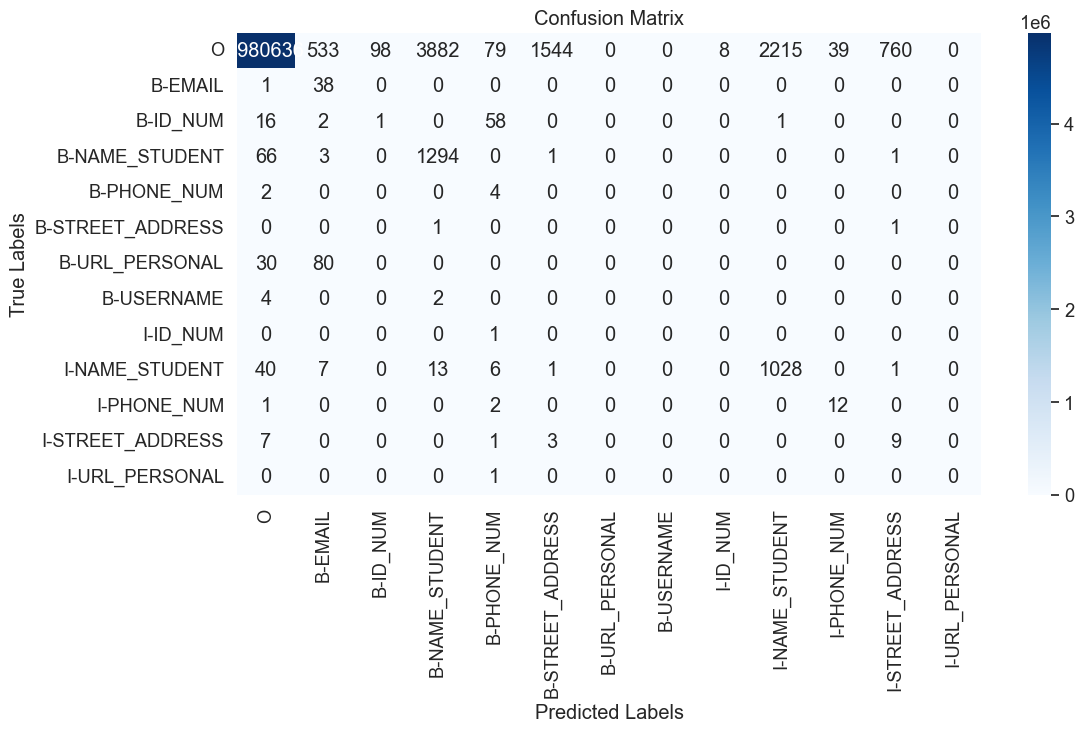

In [95]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Metrics

In [100]:
def compute_metrics_per_class(TP, FN, FP, class_label, beta=5):
    
    tp = TP[class_label]
    fn = FN[class_label]
    fp = FP[class_label]
    
    precision = tp / (tp + fp) if tp + fp > 0 else 0 
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f_beta = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall) if precision + recall > 0 else 0
    
    metrics = {'precision':precision, 'recall':recall, 'f_beta':f_beta,'tp':tp, 'fp':fp, 'fn':fn}
    
    return metrics

In [125]:
def compute_micro_metrics(predictions, labels, num_classes, pos_labels, beta=5):
#     global class_metrics
    
    
    confusion_matrix, TP, TN, FN, FP = count_confusion_matrix(predictions = predictions, labels = labels, num_classes = len(classes))
    #class_metrics = {}

    #class_metrics = {id2classes[class_label]:compute_metrics_per_class(predictions, labels, pos_labels, beta) for class_label in pos_labels}
    #'O' included for analysis
#     class_metrics = {class_label:compute_metrics_per_class(TP, FN, FP, class_label, beta) for class_label in pos_labels}
    class_metrics = {class_label:compute_metrics_per_class(TP, FN, FP, class_label, beta) for class_label in range(num_classes)}
    
    
    # Calculate total true positives, false positives, and false negatives excluding 'O' label
    total_tp = sum(TP[pos_labels])
    total_fp = sum(FP[pos_labels])
    total_fn = sum(FN[pos_labels])
    
    # Compute total precision excluding 'O' label
    total_precision = total_tp / (total_tp + total_fp) if total_tp + total_fp > 0 else 0
    
    # Compute total recall excluding 'O' label
    total_recall = total_tp / (total_tp + total_fn) if total_tp + total_fn > 0 else 0
    
    # Compute total F-beta score excluding 'O' label
    total_f_beta = (1 + beta**2) * (total_precision * total_recall) / (beta**2 * total_precision + total_recall) if total_precision + total_recall > 0 else 0
    
    total_metrics = {'precision':total_precision, 'recall':total_recall, 'f_beta':total_f_beta,'tp':total_tp, 'fp':total_fp, 'fn':total_fn}
    
    return total_metrics, class_metrics


In [124]:
%%time
total_metrics_2, class_metrics_2 = compute_micro_metrics(predictions = flat_word_label_ids, labels = flat_word_true_labels_id, num_classes = len(classes), pos_labels=classes_pos_id, beta=5)

CPU times: total: 93.8 ms
Wall time: 93 ms


In [117]:
total_metrics_2

{'precision': 0.20341005967604434,
 'recall': 0.8711208470244615,
 'f_beta': 0.7734679882800324,
 'tp': 2386,
 'fp': 9344,
 'fn': 353}

In [114]:
total_metrics_2

{'precision': 0.20341005967604434,
 'recall': 0.8711208470244615,
 'f_beta': 0.7734679882800324,
 'tp': 2386,
 'fp': 9344,
 'fn': 353}

In [122]:
class_metrics == class_metrics_2

True

In [116]:
class_metrics == class_metrics_2

True

In [115]:
total_metrics == total_metrics_2

True

In [113]:
class_metrics_2

{1: {'precision': 0.05731523378582202,
  'recall': 0.9743589743589743,
  'f_beta': 0.6031746031746031,
  'tp': 38,
  'fp': 625,
  'fn': 1},
 2: {'precision': 0.010101010101010102,
  'recall': 0.01282051282051282,
  'f_beta': 0.01268911664226452,
  'tp': 1,
  'fp': 98,
  'fn': 77},
 3: {'precision': 0.2492295839753467,
  'recall': 0.947985347985348,
  'f_beta': 0.8557112699341252,
  'tp': 1294,
  'fp': 3898,
  'fn': 71},
 4: {'precision': 0.02631578947368421,
  'recall': 0.6666666666666666,
  'f_beta': 0.3443708609271523,
  'tp': 4,
  'fp': 148,
  'fn': 2},
 5: {'precision': 0.0,
  'recall': 0.0,
  'f_beta': 0,
  'tp': 0,
  'fp': 1549,
  'fn': 2},
 6: {'precision': 0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 0, 'fn': 110},
 7: {'precision': 0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 0, 'fn': 6},
 8: {'precision': 0.0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 8, 'fn': 1},
 9: {'precision': 0.31689272503082616,
  'recall': 0.9379562043795621,
  'f_beta': 0.8722098942696775,
  'tp':

In [85]:
confusion_matrix[1]

9511

In [77]:
classes

['O',
 'B-EMAIL',
 'B-ID_NUM',
 'B-NAME_STUDENT',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'B-URL_PERSONAL',
 'B-USERNAME',
 'I-ID_NUM',
 'I-NAME_STUDENT',
 'I-PHONE_NUM',
 'I-STREET_ADDRESS',
 'I-URL_PERSONAL']

In [75]:
confusion_matrix

array([[1, 0, 2],
       [2, 1, 0],
       [0, 2, 1]])

# Analysis

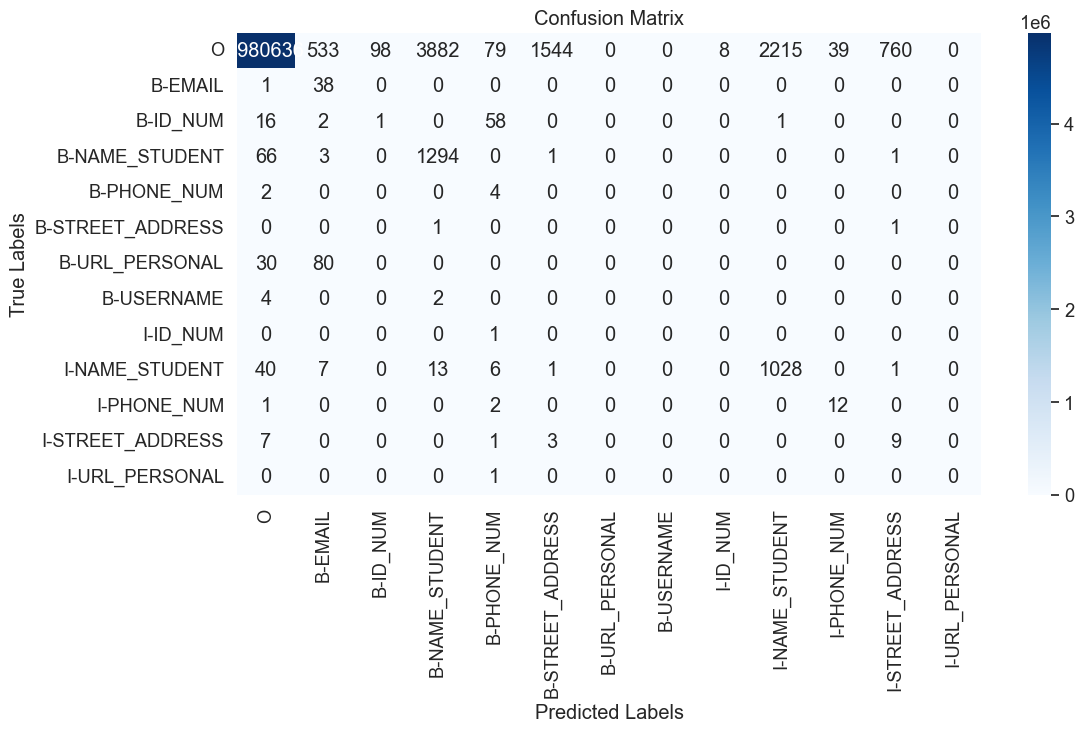

In [118]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

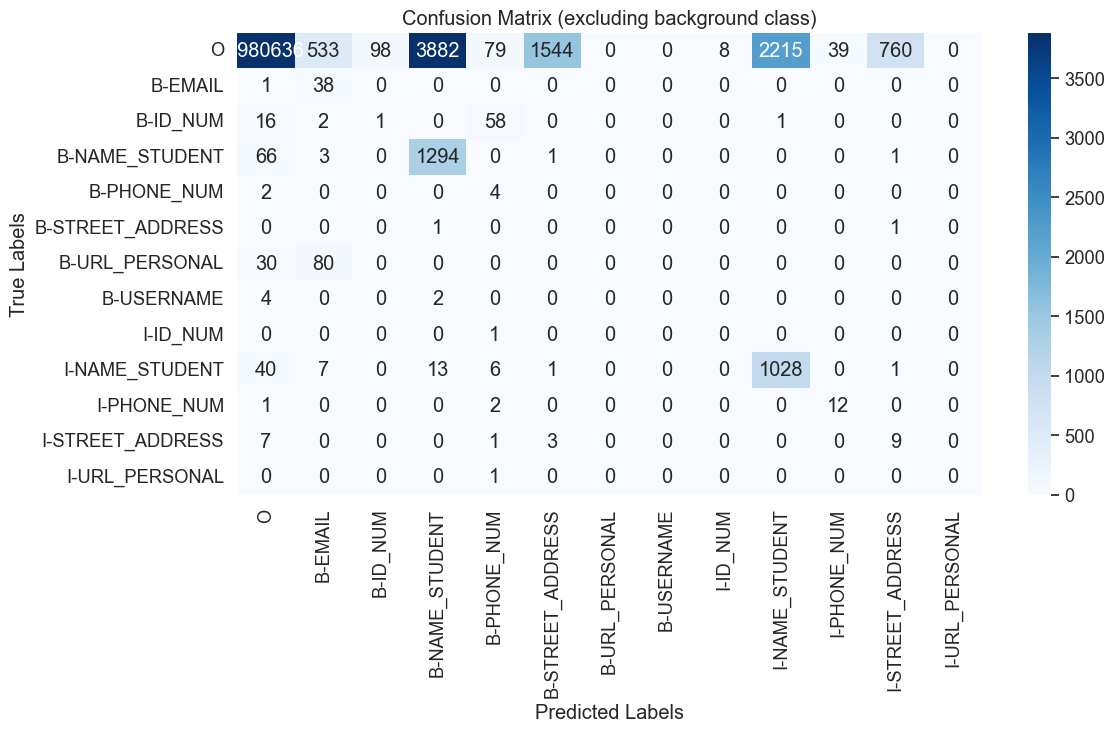

In [135]:
# conf_matrix = np.array([[20, 5, 0],
#                         [3, 25, 2],
#                         [1, 4, 18]])

conf_matrix = confusion_matrix

# Define class labels
# classes = ['Class 1', 'Class 2', 'Class 3']

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  # Adjust font scale

# Calculate vmin and vmax excluding the background class
vmin = np.min(conf_matrix[conf_matrix != conf_matrix[0,0]])
vmax = np.max(conf_matrix[conf_matrix != conf_matrix[0,0]])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes, vmin=vmin, vmax=vmax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (excluding background class)')
plt.show()

In [137]:
classes

['O',
 'B-EMAIL',
 'B-ID_NUM',
 'B-NAME_STUDENT',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'B-URL_PERSONAL',
 'B-USERNAME',
 'I-ID_NUM',
 'I-NAME_STUDENT',
 'I-PHONE_NUM',
 'I-STREET_ADDRESS',
 'I-URL_PERSONAL']

In [136]:
conf_matrix

array([[4980636,     533,      98,    3882,      79,    1544,       0,
              0,       8,    2215,      39,     760,       0],
       [      1,      38,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0],
       [     16,       2,       1,       0,      58,       0,       0,
              0,       0,       1,       0,       0,       0],
       [     66,       3,       0,    1294,       0,       1,       0,
              0,       0,       0,       0,       1,       0],
       [      2,       0,       0,       0,       4,       0,       0,
              0,       0,       0,       0,       0,       0],
       [      0,       0,       0,       1,       0,       0,       0,
              0,       0,       0,       0,       1,       0],
       [     30,      80,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0],
       [      4,       0,       0,       2,       0,       0, 

In [126]:
class_metrics

{0: {'precision': 0.9999664712697932,
  'recall': 0.9981646536911143,
  'f_beta': 0.9982338342902771,
  'tp': 4980636,
  'fp': 167,
  'fn': 9158},
 1: {'precision': 0.05731523378582202,
  'recall': 0.9743589743589743,
  'f_beta': 0.6031746031746031,
  'tp': 38,
  'fp': 625,
  'fn': 1},
 2: {'precision': 0.010101010101010102,
  'recall': 0.01282051282051282,
  'f_beta': 0.01268911664226452,
  'tp': 1,
  'fp': 98,
  'fn': 77},
 3: {'precision': 0.2492295839753467,
  'recall': 0.947985347985348,
  'f_beta': 0.8557112699341252,
  'tp': 1294,
  'fp': 3898,
  'fn': 71},
 4: {'precision': 0.02631578947368421,
  'recall': 0.6666666666666666,
  'f_beta': 0.3443708609271523,
  'tp': 4,
  'fp': 148,
  'fn': 2},
 5: {'precision': 0.0,
  'recall': 0.0,
  'f_beta': 0,
  'tp': 0,
  'fp': 1549,
  'fn': 2},
 6: {'precision': 0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 0, 'fn': 110},
 7: {'precision': 0, 'recall': 0.0, 'f_beta': 0, 'tp': 0, 'fp': 0, 'fn': 6},
 8: {'precision': 0.0, 'recall': 0.0, 'f_b

# Bin

In [14]:
import gc
from pympler import asizeof


In [15]:
from tqdm import tqdm

In [24]:
def top_memory_objects(n=10):
    # Get all objects currently in memory
    all_objects = gc.get_objects()
    print(f"Total objects in memory: {len(all_objects)}")
    
    all_objects = all_objects[:1000]
    print(f"Total objects in subset: {len(all_objects)}")

    # Create a list of tuples (size, object) and filter out small objects for performance reasons
#     sizes_objects = [(asizeof.asizeof(obj), obj) for obj in all_objects if asizeof.asizeof(obj) > 1000]

    sizes_objects = []
    
    for obj in tqdm(all_objects, desc="Calculating object sizes"):
#     for obj in all_objects:
        try:
            size = asizeof.asizeof(obj)
            if size > 1000:
                sizes_objects.append((size,obj))
        except Exception as e:
            sizes_objects.append((0, e))
        
    # Sort the list of tuples by size in descending order
    sorted_sizes_objects = sorted(sizes_objects, key=lambda x: x[0], reverse=True)

    # Print the top N objects
    
    return sorted_sizes_objects
    



In [25]:
%%time
# Display the top 10 objects by memory usage
sizes = top_memory_objects(10)

for size, obj in sizes[:10]:
    print(f"Object type: {type(obj)}, Size: {size} bytes")

Total objects in memory: 465487
Total objects in subset: 1000


Calculating object sizes:   0%|                                                               | 0/1000 [00:00<?, ?it/s]D:\Anaconda3\envs\nlp_torch\Lib\site-packages\pympler\asizeof.py:721: UserWarning: Iterating '<class 'traitlets.config.loader.Config'>': TypeError("'LazyConfigValue' object is not iterable")
  warnings.warn("Iterating '%s': %r" % (_classof(obj), x))
Calculating object sizes: 100%|████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.66it/s]

Object type: <class 'dict'>, Size: 2536774600 bytes
Object type: <class 'tuple'>, Size: 2536774544 bytes
Object type: <class 'tuple'>, Size: 2536774416 bytes
Object type: <class 'dict'>, Size: 2536774200 bytes
Object type: <class 'cell'>, Size: 2536771024 bytes
Object type: <class 'cell'>, Size: 2536770736 bytes
Object type: <class 'list'>, Size: 5838720 bytes
Object type: <class 'list'>, Size: 831408 bytes
Object type: <class 'list'>, Size: 831024 bytes
Object type: <class 'dict'>, Size: 822912 bytes
CPU times: total: 1min 6s
Wall time: 1min 8s


## B_mask tests

In [125]:
out = to_bio_vect(list_pred_words[0])

In [139]:
out = to_bio_vect(sample_array)

In [140]:
sample_array = np.array( [1,2,3,4,4,5,6,6,6,3,3,3,2,1,0,0])
desired_array = np.array( [0,0,0,0,1,0,0,1,2,0,1,2,0,0,0,1])

In [141]:
sample_array

array([1, 2, 3, 4, 4, 5, 6, 6, 6, 3, 3, 3, 2, 1, 0, 0])

In [142]:
zeros

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False])

In [143]:
diff_array

array([ 2,  1,  1,  1,  0,  1,  1,  0,  0, -3,  0,  0, -1, -1, -1,  0])

In [130]:
change_indices

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [131]:
cumsum

array([0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 6])

In [132]:
accumulate

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5])

In [133]:
out

array([0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1])

In [134]:
desired_array

array([0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1])

## To Bio test

In [253]:
sample_array = np.array( [1,2,3,4,4,5,6,6,6,3,3,3,2,1,0,0,4,4,4,8,8,8,8,10,10])
to_bio_vect(sample_array)

array([ 0,  3,  0,  4, 10,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  4,
       10, 10,  2,  8,  8,  8,  8,  8], dtype=int8)

In [254]:
sample_array

array([ 1,  2,  3,  4,  4,  5,  6,  6,  6,  3,  3,  3,  2,  1,  0,  0,  4,
        4,  4,  8,  8,  8,  8, 10, 10])

In [243]:
np_pred_words_temp

array([0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 4, 2, 2, 2,
       2, 2, 2], dtype=int8)

In [228]:
model_adapter.model_id2cur_ent_label

{0: 'O',
 1: 'O',
 2: 'NAME_STUDENT',
 3: 'O',
 4: 'PHONE_NUM',
 5: 'O',
 6: 'O',
 7: 'O',
 8: 'ID_NUM',
 9: 'O',
 10: 'ID_NUM',
 11: 'O',
 12: 'STREET_ADDRESS',
 13: 'O',
 14: 'EMAIL',
 15: 'O',
 16: 'O',
 17: 'O'}

In [195]:
classes2id

{'O': 0,
 'B-EMAIL': 1,
 'B-ID_NUM': 2,
 'B-NAME_STUDENT': 3,
 'B-PHONE_NUM': 4,
 'B-STREET_ADDRESS': 5,
 'B-URL_PERSONAL': 6,
 'B-USERNAME': 7,
 'I-ID_NUM': 8,
 'I-NAME_STUDENT': 9,
 'I-PHONE_NUM': 10,
 'I-STREET_ADDRESS': 11,
 'I-URL_PERSONAL': 12}

In [248]:
entity2id

{'O': 0,
 'EMAIL': 1,
 'ID_NUM': 2,
 'NAME_STUDENT': 3,
 'PHONE_NUM': 4,
 'STREET_ADDRESS': 5,
 'URL_PERSONAL': 6,
 'USERNAME': 7}

In [247]:
entity_id2class_id

{0: [0, 0],
 1: [1, 1],
 2: [2, 2],
 3: [3, 9],
 4: [4, 10],
 5: [5, 11],
 6: [6, 12],
 7: [7, 7]}

In [222]:
b_words_mapped

array([4, 0, 0, 0, 0, 0, 4, 4, 2, 2, 2, 2])

In [226]:
i_words_mapped

array([[ 0,  0],
       [ 3,  9],
       [ 0,  0],
       [ 4, 10],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 3,  9],
       [ 0,  0],
       [ 0,  0],
       [ 4, 10],
       [ 2,  2],
       [ 2,  2]])

In [219]:
i_mask_indices

(array([ 0,  1,  2,  3,  5,  6,  9, 12, 13, 14, 16, 19, 23], dtype=int64),)

In [215]:
b_mask_indices

(array([ 4,  7,  8, 10, 11, 15, 17, 18, 20, 21, 22, 24], dtype=int64),)

In [198]:
i_words

array([ 1,  2,  3,  4,  5,  6,  3,  2,  1,  0,  4,  8, 10])

In [199]:
b_words

array([ 4,  6,  6,  3,  3,  0,  4,  4,  8,  8,  8, 10])

In [178]:
i_mask_indices

(array([ 0,  1,  2,  3,  5,  6,  9, 12, 13, 14, 16, 19, 23], dtype=int64),)

In [176]:
b_mask_indices

(array([ 4,  7,  8, 10, 11, 15, 17, 18, 20, 21, 22, 24], dtype=int64),)

### Done

In [250]:
model_id2cur_ent_label = {
            0:'O', 
            1:'O',
            2:'NAME_STUDENT',
            3:'O',
            4:'PHONE_NUM',
            5:'O',
            6:'O',
            7:'O',
            8:'ID_NUM',
            9:'O',
            10:'ID_NUM',
            11:'O',
            12:'STREET_ADDRESS',
            13:'O',
            14:'EMAIL',
            15:'O',
            16:'O',
            17:'O'}

In [147]:
model_id2cur_entity_id = {model_id: entity2id[model_id2cur_ent_label[model_id]] for model_id,_ in model_id2cur_ent_label.items()}

## Class changes

### Old

In [ ]:
class Yanis_Adapter(PII_Adapter):
    def __init__(self, threshold = 0.1):
        super().__init__("Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1")
        
        self.O_id = self.model.config.label2id['O']
            
        self.threshold = threshold
        self.model_id2cur_ent_label = {
            0:'O', 
            1:'O',
            2:'NAME_STUDENT',
            3:'O',
            4:'PHONE_NUM',
            5:'O',
            6:'O',
            7:'O',
            8:'ID_NUM',
            9:'O',
            10:'ID_NUM',
            11:'O',
            12:'STREET_ADDRESS',
            13:'O',
            14:'EMAIL',
            15:'O',
            16:'O',
            17:'O'}
        
        #B Only
#         self.model_id2cur_id = {key:classes2id[value] for key,value in self.model_id2cur_label.items()}
        
        self.labels_irrelevant = [key for key,value in self.model_id2cur_ent_label.items() if value == 'O' and key != self.O_id]
        
        rev_model_id2cur_ent_label = {value:key for key,value in  self.model_id2cur_ent_label.items()}
        rev_model_id2cur_ent_label['O'] = self.O_id
        
        cur_label2model_id = {'O': self.O_id}
        for label in classes:
            if label == 'O':  
                continue
            else:
                entity = label.split('-')[1]

                if entity in rev_model_id2cur_ent_label:
                    cur_label2model_id[label] = rev_model_id2cur_ent_label[entity]        
                else:
                    cur_label2model_id[label] = rev_model_id2cur_ent_label['O']
                    
        self.cur_label2model_id = cur_label2model_id

### New

In [15]:
class Yanis_Adapter(PII_Adapter):
    def __init__(self, threshold = 0.1):
        super().__init__("Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1")
        
        self.O_id = self.model.config.label2id['O']
            
        self.threshold = threshold
        self.model_id2cur_ent_label = {
            0:'O', 
            1:'O',
            2:'NAME_STUDENT',
            3:'O',
            4:'PHONE_NUM',
            5:'O',
            6:'O',
            7:'O',
            8:'ID_NUM',
            9:'O',
            10:'ID_NUM',
            11:'O',
            12:'STREET_ADDRESS',
            13:'O',
            14:'EMAIL',
            15:'O',
            16:'O',
            17:'O'}
        
        self.model_id_pos = [i for i,label in self.model_id2cur_ent_label.items() if label!='O']
        self.model_id2cur_entity_id = {model_id: entity2id[self.model_id2cur_ent_label[model_id]] for model_id,_ in self.model_id2cur_ent_label.items()}
        self.np_model_id2cur_entity_id = np.array([entity2id[self.model_id2cur_ent_label[model_id]] for model_id,_ in self.model_id2cur_ent_label.items()], dtype='int8')
        #B Only
#         self.model_id2cur_id = {key:classes2id[value] for key,value in self.model_id2cur_label.items()}
        
        self.labels_irrelevant = [key for key,value in self.model_id2cur_ent_label.items() if value == 'O' and key != self.O_id]
        
        rev_model_id2cur_ent_label = {value:key for key,value in  self.model_id2cur_ent_label.items()}
        rev_model_id2cur_ent_label['O'] = self.O_id
        
        cur_label2model_id = {'O': self.O_id}
        for label in classes:
            if label == 'O':  
                continue
            else:
                entity = label.split('-')[1]

                if entity in rev_model_id2cur_ent_label:
                    cur_label2model_id[label] = rev_model_id2cur_ent_label[entity]        
                else:
                    cur_label2model_id[label] = rev_model_id2cur_ent_label['O']
                    
        self.cur_label2model_id = cur_label2model_id
        
        
        
model_adapter = Yanis_Adapter()

In [14]:
def process_data(data, mode: str = None):
    if mode is not None:
        if not isinstance(mode, str):
            raise TypeError("Mode must be a string.")
        # Process data with specified mode
    else:
        # Process data with default behavior
        pass

In [19]:
def process_data(data, mode=None):
    if mode is None:
        # Default mode
        # Process data with default behavior
        print('first')
        pass
    elif mode == 'custom':
        print('second')
        # Custom mode
        # Process data with custom behavior
        pass
    else:
        print('third')
        # Handle other modes
        pass

# Calling the function with different scenarios:
process_data('dsadas')  # No mode specified, defaults to default behavior
process_data('dsadas', mode=None)  # Explicitly passing None
process_data('dsadas', mode='custom')

first
first
second


In [20]:
def process_data(data, mode: str = None):
    if mode is not None:
        if not isinstance(mode, str):
            raise TypeError("Mode must be a string.")
        print("Processing data with mode:", mode)
    else:
        print("Processing data with default behavior.")

# Calling the function with different scenarios:
process_data("some_data")  # No mode specified, defaults to default behavior
process_data("some_data", mode=None)  # Explicitly passing None, might raise a TypeError
process_data("some_data", mode='custom')  # Explicitly passing a custom mode

Processing data with default behavior.
Processing data with default behavior.
Processing data with mode: custom


In [15]:
process_data(None)

In [17]:
process_data(None, mode=None)

In [ ]:
process_data(None, mode=None)